In [3]:
1+1

2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import shutil
from tensorboard.backend.event_processing import event_accumulator
import subprocess
import webbrowser
import os

In [5]:
def get_summary(save_path,prepend=""):
    ea = event_accumulator.EventAccumulator(save_path)
    if not os.path.exists(save_path):
        print("no save path found, returning empy dict...")
        return dict()
    ea.Reload()
    res = dict()
    for tag in ea.Tags()['scalars']:
        evs = ea.Scalars(tag)
        wall_time = [e.wall_time for e in evs]
        step = [e.step for e in evs]
        value = [e.value for e in evs]
        tag = prepend + tag
        res[tag] = value
        res[tag+"_step"] = step
        res[tag + "_wall_time"] = wall_time
    res[prepend + 'scalars'] = [prepend + t for t in ea.Tags()['scalars']]
    scalars = ea.Tags()['scalars']
    print("> get_summary():%s*; got %i scalars %s" % (prepend, len(scalars), ", ".join(scalars)))

    drs = os.listdir(save_path)
    for d in drs:
        np = os.path.join(save_path, d)
        if os.path.isdir(np):
            res.update( get_summary(np, d+'/') )
    return res

In [6]:
logs = get_summary('C:/Users/Aksel/Desktop/Studie/kandidat/Avanceret Machine Learning/02460_doom_rl_2019/gdoom/defend_the_line_exp')

> get_summary():*; got 0 scalars 
> get_summary():train_defend_the_line_lr=0.0001_bs=10_0/*; got 9 scalars Perf/Reward, Perf/Length, Perf/Value, Perf/Kills, Losses/Value Loss, Losses/Policy Loss, Losses/Entropy, Losses/Grad Norm, Losses/Var Norm
> get_summary():train_defend_the_line_lr=0.0001_bs=10_1/*; got 9 scalars Perf/Reward, Perf/Length, Perf/Value, Perf/Kills, Losses/Value Loss, Losses/Policy Loss, Losses/Entropy, Losses/Grad Norm, Losses/Var Norm
> get_summary():train_defend_the_line_lr=0.0001_bs=10_2/*; got 9 scalars Perf/Reward, Perf/Length, Perf/Value, Perf/Kills, Losses/Value Loss, Losses/Policy Loss, Losses/Entropy, Losses/Grad Norm, Losses/Var Norm
> get_summary():train_defend_the_line_lr=0.0001_bs=10_3/*; got 9 scalars Perf/Reward, Perf/Length, Perf/Value, Perf/Kills, Losses/Value Loss, Losses/Policy Loss, Losses/Entropy, Losses/Grad Norm, Losses/Var Norm
> get_summary():train_defend_the_line_lr=0.01_bs=10_0/*; got 9 scalars Perf/Reward, Perf/Length, Perf/Value, Perf/Kill

In [95]:
timealive_2_0 =np.asarray(logs['train_defend_the_line_lr=0.01_bs=10_0/Perf/Length'])
timealive_2_1 =np.asarray(logs['train_defend_the_line_lr=0.01_bs=10_1/Perf/Length'])
timealive_2_2 =np.asarray(logs['train_defend_the_line_lr=0.01_bs=10_2/Perf/Length'])
timealive_2_3 =np.asarray(logs['train_defend_the_line_lr=0.01_bs=10_3/Perf/Length'])


timealive_4_0 =np.asarray(logs['train_defend_the_line_lr=0.0001_bs=10_0/Perf/Length'])
timealive_4_1 =np.asarray(logs['train_defend_the_line_lr=0.0001_bs=10_1/Perf/Length'])
timealive_4_2 =np.asarray(logs['train_defend_the_line_lr=0.0001_bs=10_2/Perf/Length'])
timealive_4_3 =np.asarray(logs['train_defend_the_line_lr=0.0001_bs=10_3/Perf/Length'])

timealive_6_0 =np.asarray(logs['train_defend_the_line_lr=1e-06_bs=10_0/Perf/Length'])
timealive_6_1 =np.asarray(logs['train_defend_the_line_lr=1e-06_bs=10_1/Perf/Length'])
timealive_6_2 =np.asarray(logs['train_defend_the_line_lr=1e-06_bs=10_2/Perf/Length'])
timealive_6_3 =np.asarray(logs['train_defend_the_line_lr=1e-06_bs=10_3/Perf/Length'])

timealive_8_0 =np.asarray(logs['train_defend_the_line_lr=1e-08_bs=10_0/Perf/Length'])
timealive_8_1 =np.asarray(logs['train_defend_the_line_lr=1e-08_bs=10_1/Perf/Length'])
timealive_8_2 =np.asarray(logs['train_defend_the_line_lr=1e-08_bs=10_2/Perf/Length'])
timealive_8_3 =np.asarray(logs['train_defend_the_line_lr=1e-08_bs=10_3/Perf/Length'])

#timealive_2=timealive_2_0+timealive_2_1+timealive_2_2+timealive_2_3
timealive_4=(timealive_4_0+timealive_4_1+timealive_4_2+timealive_4_3)
timealive_6=(timealive_6_0+timealive_6_1+timealive_6_2+timealive_6_3)
timealive_8=(timealive_8_0+timealive_8_1+timealive_8_2+timealive_8_3)


# the total number of frames used to train:
print(timealive_2_0.sum()+timealive_2_1.sum()+timealive_2_2.sum()+timealive_2_3.sum())
print(timealive_4_0.sum()+timealive_4_1.sum()+timealive_4_2.sum()+timealive_4_3.sum())
print(timealive_6_0.sum()+timealive_6_1.sum()+timealive_6_2.sum()+timealive_6_3.sum())
print(timealive_8_0.sum()+timealive_8_1.sum()+timealive_8_2.sum()+timealive_8_3.sum())

145281.46663665771
1761837.2337722778
1792109.2995376587
1493616.4998550415


In [ ]:
# Average time alive in the last 100 episodes
int(round(timealive[-20:-1].mean(), 0))

In [79]:
kills_2_0= np.asarray(logs['train_defend_the_line_lr=0.01_bs=10_0/Perf/Kills'])
kills_4_0= np.asarray(logs['train_defend_the_line_lr=0.0001_bs=10_0/Perf/Kills'])
kills_6_0= np.asarray(logs['train_defend_the_line_lr=1e-06_bs=10_0/Perf/Kills'])
kills_8_0= np.asarray(logs['train_defend_the_line_lr=1e-08_bs=10_0/Perf/Kills'])

kills_2_1= np.asarray(logs['train_defend_the_line_lr=0.01_bs=10_1/Perf/Kills'])
kills_4_1= np.asarray(logs['train_defend_the_line_lr=0.0001_bs=10_1/Perf/Kills'])
kills_6_1= np.asarray(logs['train_defend_the_line_lr=1e-06_bs=10_1/Perf/Kills'])
kills_8_1= np.asarray(logs['train_defend_the_line_lr=1e-08_bs=10_1/Perf/Kills'])

kills_2_2= np.asarray(logs['train_defend_the_line_lr=0.01_bs=10_2/Perf/Kills'])
kills_4_2= np.asarray(logs['train_defend_the_line_lr=0.0001_bs=10_2/Perf/Kills'])
kills_6_2= np.asarray(logs['train_defend_the_line_lr=1e-06_bs=10_2/Perf/Kills'])
kills_8_2= np.asarray(logs['train_defend_the_line_lr=1e-08_bs=10_2/Perf/Kills'])

kills_2_3= np.asarray(logs['train_defend_the_line_lr=0.01_bs=10_3/Perf/Kills'])
kills_4_3= np.asarray(logs['train_defend_the_line_lr=0.0001_bs=10_3/Perf/Kills'])
kills_6_3= np.asarray(logs['train_defend_the_line_lr=1e-06_bs=10_3/Perf/Kills'])
kills_8_3= np.asarray(logs['train_defend_the_line_lr=1e-08_bs=10_3/Perf/Kills'])
kills_2=kills_2_0
#kills_2=(kills_2_0 + kills_2_1 + kills_2_2 + kills_2_3) / 4
kills_4=(kills_4_0 + kills_4_1 + kills_4_2 + kills_4_3) / 4
kills_6=(kills_6_0 + kills_6_1 + kills_6_2 + kills_6_3) / 4
kills_8=(kills_8_0 + kills_8_1 + kills_8_2 + kills_8_3) / 4



smooth_factor= 50
while (len(kills_2) % smooth_factor != 0):
    kills_2= kills_2[:-1]
while (len(kills_4) % smooth_factor != 0):
    kills_4= kills_4[:-1]
while (len(kills_6) % smooth_factor != 0):
    kills_6= kills_6[:-1]
while (len(kills_8) % smooth_factor != 0):
    kills_8= kills_8[:-1]

# Plotting avg. kills as a function of episode nr. 
kills_2=np.mean(kills_2.reshape(-1, smooth_factor), axis=1)
kills_4=np.mean(kills_4.reshape(-1, smooth_factor), axis=1)
kills_6=np.mean(kills_6.reshape(-1, smooth_factor), axis=1)
kills_8=np.mean(kills_8.reshape(-1, smooth_factor), axis=1)


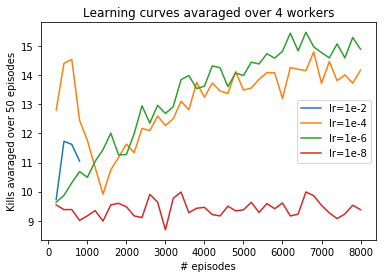

In [80]:
plt.plot(np.asarray(range(1,len(kills_2)+1))*4*1*smooth_factor,kills_2, label='lr=1e-2')
plt.plot(np.asarray(range(1,len(kills_4)+1))*4*1*smooth_factor,kills_4, label='lr=1e-4')
plt.plot(np.asarray(range(1,len(kills_6)+1))*4*1*smooth_factor,kills_6, label='lr=1e-6')
plt.plot(np.asarray(range(1,len(kills_8)+1))*4*1*smooth_factor,kills_8, label='lr=1e-8')
plt.legend(loc='best')
plt.xlabel('# episodes')
plt.ylabel(str('Kills avaraged over '+str(smooth_factor)+ ' episodes'))
plt.title('Learning curves avaraged over 4 workers')
plt.show()

In [12]:
logs['train_defend_the_line_lr=0.0001_bs=10_0/Perf/Kills']

[4.0,
 4.0,
 3.75,
 4.0,
 6.0,
 7.0,
 9.800000190734863,
 11.199999809265137,
 11.800000190734863,
 9.800000190734863,
 11.399999618530273,
 8.800000190734863,
 7.800000190734863,
 7.599999904632568,
 10.0,
 9.0,
 10.0,
 11.600000381469727,
 12.600000381469727,
 10.600000381469727,
 8.800000190734863,
 9.199999809265137,
 8.600000381469727,
 8.399999618530273,
 10.199999809265137,
 12.199999809265137,
 12.399999618530273,
 14.0,
 14.199999809265137,
 14.600000381469727,
 14.600000381469727,
 15.600000381469727,
 16.600000381469727,
 19.200000762939453,
 18.200000762939453,
 19.600000381469727,
 19.200000762939453,
 18.600000381469727,
 17.399999618530273,
 18.200000762939453,
 18.399999618530273,
 17.799999237060547,
 19.0,
 18.200000762939453,
 16.399999618530273,
 14.600000381469727,
 13.399999618530273,
 11.800000190734863,
 11.399999618530273,
 12.199999809265137,
 12.800000190734863,
 13.399999618530273,
 12.399999618530273,
 12.600000381469727,
 12.600000381469727,
 13.1999998092

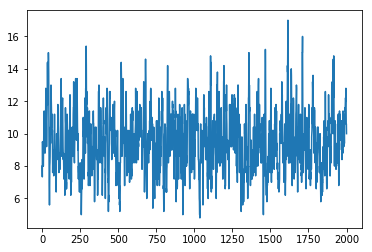

In [19]:
plt.plot(range(1,len(kills_4)+1),kills_8)

In [15]:
range(1,len(kills_2)+1)

range(1, 208)

In [82]:
len(kills_2_0)

207

In [78]:
np.mean(kills_6[-5:])

14.890400024414063

In [94]:
np.mean(timealive_6[-100:])

236.43149990081787